<a href="https://colab.research.google.com/github/opensim-org/CMBBE2024/blob/main/Demo2_OpenSimIKPipeline/Demo%202%20-%20Preview%2C%20Inverse%20Kinematics%20and%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Preview Mocap Data, Inverse Kinematics and Analysis


## 2.1. Objectives


Inverse Kinematics computes the joint angles for a musculoskeletal model that best reproduce the motion of a subject.
In this tutorial, you will:

*   Become familiar with OpenSim's tools to visualize Mocap data.
*   Solve an Inverse Kinematics problem using experimental data.
*   Evaluate/Plot a quantity of interest based on the Inverse Kinematics Solution.

**Format**

Each section of the tutorial guides you through certain tools within OpenSim and asks you to answer a few questions. The questions can be answered based on information from OpenSim and basic knowledge of the human musculoskeletal system. As you complete each section of the tutorial, feel free to explore OpenSim and the lower extremity model further on your own.

## 2.2. Set up Conda and OpenSim

First, set up the environment by executing the following cell (See [Tutorial 1: Introduction to OpenSim in Colab](https://drive.google.com/file/d/1P_2IRJFzdodS1-ce4BsOsC9d8xWXCqXS/view?usp=sharing) for more information).

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


Don't worry if after executing the previous cell you get an error saying that your session has failed. The reason for this is that condacolab needs to restart the session for the changes to take effect. Because of this, you have to execute the previous cell first, before executing any other cell.

Now, let's install the OpenSim conda package.

In [1]:
!conda install opensim_admin::opensim-moco

Channels:
 - conda-forge
 - opensim_admin
Platform: linux-64
Solving environment: - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - opensim_admin::opensim-moco


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       hbcca054_0         151 KB  conda-forge
    certifi-2024.6.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    libblas-3.9.0              |22_linux64_openblas          14 KB  conda-forge
    libcblas-3.9.0             |22_linux64_openblas          14 KB  conda-forge
    libgfortran-ng-13.2.0      |      h69a702a_13          47 KB  conda-forge
    libgfortran5-13.2.0        |      h3d2ce59_13     

## 2.3. Preview Mocap Data

In this tutorial, you will be using an OpenSim  musculoskeletal model provided by OpenCap .. Detailed information about the model can found on the this page, but first we install the python code/packages needed for visualization

In [2]:
!pip install pygltflib
!conda install -c conda-forge vtk

# Mount OpenSim Viewer code base.
!git clone https://github.com/opensim-org/opensim-viewer-backend.git

# Import the viewport module.
import sys
sys.path.append('opensim-viewer-backend')
import osimViewport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.1 MB/s eta 0:00:00
  Created wheel for pygltflib: filename=pygltflib-1.16.2-py3-none-any.whl size=27300 sha256=4079482f82c6758b0a5b3b99ee189a7e90c1aee96174f21a401d3af7a0800c1f
  Stored in directory: /root/.cache/pip/wheels/4a/95/a2/2ee16c602170b0601ebeddbf06597868f09b7dbb0495ae99c4
Successfully built pygltflib
Channels:
 - conda-forge
 - opensim_admin
Platform: linux-64
Solving environment: \ | / - \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - vtk


The following pack

The visualization works by converting OpenSim's native files into a standard format (.gltf) that's used by the viewer and is universally viewable by other publicly available tools (Blender, 3D Viewer on windows etc.)

**Download Files**

First, let's download the mocap data file (`Squat.trc`). The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [4]:
!gdown https://drive.google.com/uc?export=download&id=1FUYgVELqpeme5rxehtIq2zPllxCHvcLp

Downloading...
From: https://drive.google.com/uc?export=download
To: /content/uc?export=download
1.69kB [00:00, 3.61MB/s]


To preview the data, we'll pull in a python module to visualize OpenSim supported files

In [5]:
ovp = osimViewport.osimViewport()
ovp.addDataFile('/content/Squat.trc')
ovp.show()

Download the generated file locally, then drag and drop into the viewer below


In [6]:
# @title Download the generated GLTF file to your computer { display-mode: "form" }
# @markdown After executing this cell, a button will appear to download the generated GLTF file to your computer.

import ipywidgets as widgets
from IPython.display import display
from google.colab import files
layout = widgets.Layout(width='250px')
button = widgets.Button(description="Download the GLTF file!", layout=layout)
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    files.download('/content/Squat.gltf')

button.on_click(on_button_clicked)
display(button, output)

Button(description='Download the GLTF file!', layout=Layout(width='250px'), style=ButtonStyle())

Output()

In [7]:
# @title Execute this cell to include the OpenSim Viewer { display-mode: "form" }
# @markdown Open the downloaded GLTF file from the Opensim Viewer to visualize.

from IPython.display import IFrame

IFrame('https://dev.d7iaa9a9lxtm6.amplifyapp.com/?css=gui', width=600, height=300)

## 2.4. Inverse Kinematics

Kinematics is the study of motion without considering the forces and moments that produce that motion [[4]](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470549148). The purpose of inverse kinematics (IK) is to estimate the joint angles of a particular subject from experimental data. In this section, you will estimate a subject's joint angles during walking by performing an IK analysis using the subject scaled model and experimentally collected walking data.

For each time step of recorded motion data, IK computes a set of joint angles that put the model in a configuration that "best matches" the experimental kinematics. OpenSim determines this "best match" by solving a weighted least squares optimization problem with the goal of minimizing marker error. Marker error is defined as the distance between an experimental marker and the corresponding model marker. Each marker has an associated weighting value, specifying how strongly that marker's error term should be minimized in the least squares problem. For each time step, the inverse kinematics tool solves for a vector of generalized coordinates (e.g., joint angles), $q$, that minimizes the weighted sum of marker errors, which is expressed as:

$\underset{q}{\text{min}}\Bigg[ \sum_{i \in \text{markers}}{w_i || x_i^{\text{exp}} - x_i(q) ||^2}^{}\Bigg] $

where $q$ is the vector of generalized coordinates (e.g., joint angles), $x_i^{\text{exp}}$ is the position of the experimental marker $i$, $x_i(q)$ is the position of the corresponding model marker $i$ (which depends on $q$), and $w_i$ is the weight associated with marker $i$.

A detailed explanation of the Inverse Kinematics Tool can be found on the [Inverse Kinematics page](https://simtk-confluence.stanford.edu:8443/display/OpenSim/Inverse+Kinematics) of the documentation.

**Download the files**

First, let's download the configuration file for the Inverse Kinematics tool.

The first file to download is the xml configuration file (`ik_setup.xml`) for the IK tool. The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [8]:
!gdown https://drive.google.com/uc?export=download&id=1OscIQTShPZDwkr_S-WLvCGpho9Az4Nl4 # ik_setup.xml
!gdown https://drive.google.com/uc?export=download&id=1FUYgVELqpeme5rxehtIq2zPllxCHvcLp # model file

Downloading...
From: https://drive.google.com/uc?export=download
To: /content/uc?export=download
1.69kB [00:00, 1.24MB/s]
Downloading...
From: https://drive.google.com/uc?export=download
To: /content/uc?export=download
1.69kB [00:00, 2.77MB/s]


**Create IK Tool**

The IK Tool helps us solve the Inverse Kinematics problem. We can pass a configuration file as a parameter (`subject01_Setup_IK.xml`).

In [9]:
# Create an IK object using the configuration file.
import opensim as osim
inverse_kinematics_tool = osim.InverseKinematicsTool('/content/ik_setup.xml')

# Print some information of the config file to check that everything is correct.
print("Name:", inverse_kinematics_tool.getName())
print("Model File:", inverse_kinematics_tool.get_model_file())
print("Marker File:", inverse_kinematics_tool.get_marker_file())
print("Accuracy:", inverse_kinematics_tool.get_accuracy())
print("Time Range: [", inverse_kinematics_tool.get_time_range(0), ",", inverse_kinematics_tool.get_time_range(1), "]")
print("Constraint Weight:", inverse_kinematics_tool.get_constraint_weight())
print()

# Print weights information
print("Weights:")
task_set = inverse_kinematics_tool.get_IKTaskSet()
for i in range(task_set.getSize()):
  task = task_set.get(i)
  print(task.getName())
  print(task.getWeight())
  print()

Name: 
Model File: LaiArnoldModified2017_poly_withArms_weldHand_scaled.osim
Marker File: Squat.trc
Accuracy: 1e-05
Time Range: [ 0.75 , 2.75 ]
Constraint Weight: inf

Weights:
r.ASIS_study
1.0

L.ASIS_study
1.0

r.PSIS_study
1.0

L.PSIS_study
1.0

r_knee_study
1.0

r_mknee_study
1.0

r_ankle_study
1.0

r_mankle_study
1.0

r_toe_study
1.0

r_5meta_study
1.0

r_calc_study
1.0

L_knee_study
1.0

L_mknee_study
1.0

L_ankle_study
1.0

L_mankle_study
1.0

L_toe_study
1.0

L_calc_study
1.0

L_5meta_study
1.0

r_shoulder_study
1.0

L_shoulder_study
1.0

C7_study
1.0

r_lelbow_study
1.0

r_melbow_study
1.0

r_lwrist_study
1.0

r_mwrist_study
1.0

L_lelbow_study
1.0

L_melbow_study
1.0

L_lwrist_study
1.0

L_mwrist_study
1.0

r_thigh1_study
1.0

r_thigh2_study
1.0

r_thigh3_study
1.0

L_thigh1_study
1.0

L_thigh2_study
1.0

L_thigh3_study
1.0

r_sh1_study
1.0

r_sh2_study
1.0

r_sh3_study
1.0

L_sh1_study
1.0

L_sh2_study
1.0

L_sh3_study
1.0

RHJC_study
1.0

LHJC_study
1.0



**Perform Inverse Kinematics**

Finally, we run the IK tool. You can visualize the resulting motion file (`inverse_kinematics.sto`) by associating it to the model.

In [10]:
inverse_kinematics_tool.run()

True

**Visualize IK motion and plot marker errors**

The output file `subject01_ik_marker_errors.sto` provides the markers errors associated with each frame of the generated motion. You can parse this file using a `TableProcessor` and visualize the error obtained per frame.

In [11]:
# Use the TableProcessor to read the motion file.
table = osim.TableProcessor("_ik_marker_errors.sto")
# Process the file.
tableErrors = table.process()
# Print labels for each column.
print(tableErrors.getColumnLabels())

('total_squared_error', 'marker_error_RMS', 'marker_error_max')


We will plot the total squared error, the RMS error for the markers, and the maximum error for the markers. In the next cell you will extract this information from the motion file.


In [12]:
# Get columns we want to plot, and the independent column (Time).
total_squared_error = tableErrors.getDependentColumn('total_squared_error')
marker_error_RMS = tableErrors.getDependentColumn('marker_error_RMS')
marker_error_max = tableErrors.getDependentColumn('marker_error_max')
x_time = tableErrors.getIndependentColumn()

Now, we can plot the error.

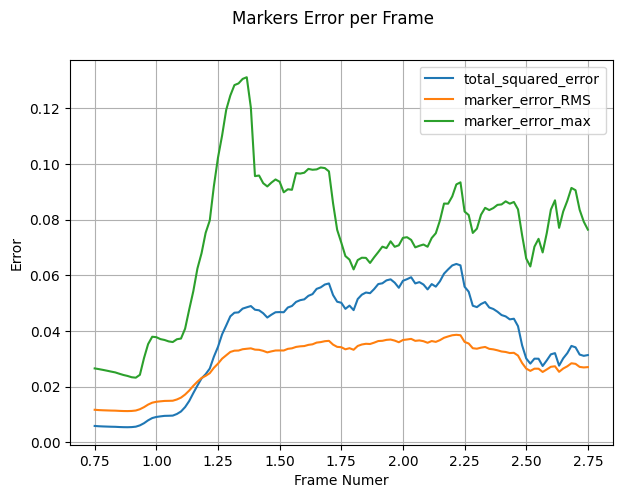

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Markers Error per Frame')

# Plot the knee angles on the first subplot.
axs.plot(x_time, total_squared_error.to_numpy(), label='total_squared_error')
axs.plot(x_time, marker_error_RMS.to_numpy(), label='marker_error_RMS')
axs.plot(x_time, marker_error_max.to_numpy(), label='marker_error_max')
axs.set_xlabel('Frame Numer')
axs.set_ylabel('Error')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

**Questions:**

4. Which markers have weighting values less than one? Why?
Hint: Think about joints that have not been modeled.

5. What is the root-mean-squared (RMS) error of all the markers in the last frame of the motion? Include units. Does this seem reasonable? Explain.

6. What was the value of the maximum marker error in the last frame? Include units. Which marker had this maximum error, and why?
Hint: Think about the weighted least squares problem.

In [14]:
ovp = osimViewport.osimViewport()
ovp.addModelAndMotionFiles('/content/LaiArnoldModified2017_poly_withArms_weldHand_scaled.osim',
                           ['/content/inverse_kinematics.sto'])
ovp.show()

In [15]:
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
layout = widgets.Layout(width='250px')
button = widgets.Button(description="Download the GLTF file!", layout=layout)
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    files.download('/content/LaiArnoldModified2017_poly_withArms_weldHand_scaled.gltf')

button.on_click(on_button_clicked)
display(button, output)

Button(description='Download the GLTF file!', layout=Layout(width='250px'), style=ButtonStyle())

Output()

In [16]:
# @title Execute this cell to include the OpenSim Viewer { display-mode: "form" }
# @markdown Open the downloaded GLTF file from the Opensim Viewer to visualize.

from IPython.display import IFrame

IFrame('https://dev.d7iaa9a9lxtm6.amplifyapp.com/?css=gui', width=600, height=300)

## 2.5. Analyze Motion

OpenSim provides tools to analyze a motion and compute quantities of interest. This is typically done by performing analyses on a motion trajectory. Examples of analses are: BodyKinematics, PointKinematics, MuscleAnalysis,... []. In this example we will run BodyKinematics to compute and later plot body accelerations and velocities.

A detailed explanation of the Inverse Dynamics Tool can be found on the [Analysis tool page](https://opensimconfluence.atlassian.net/wiki/spaces/OpenSim/pages/53088479/How+to+Use+the+Analysis+Tool) of the documentation.

**Download the files**

First, let's download the configuration file (`bodykin_setup.xml`) for the Analyze tool. The file is stored in a Google Drive folder.

In [ ]:
!gdown https://drive.google.com/uc?export=download&id= # subject01_Setup_InverseDynamics.xml

In [ ]:
!gdown "14aOk5udB8pgafettraCZgv3ULnAWzvyI&confirm=t" # bodykin_setup.xml

**Create Analysis Tool**

The Analyze Tool helps us perform analyses to compute quantities relevant for research questions or clinical assessment. We can pass a configuration file as a parameter (`bodykin_setup.xml`).

In [19]:
# Create an Analyze Tool object using the configuration file.
analyze_tool = osim.AnalyzeTool('bodykin_setup.xml')

# Print some information of the config file to check that everything is correct.
print("Name:", analyze_tool.getName())
print("Model File:", analyze_tool.getModelFilename())
print("Time Range: [", analyze_tool.getInitialTime(), ",", analyze_tool.getFinalTime(), "]")
print()

Name: LaiArnoldModified2017_poly_withArms_weldHand_scaled
Model File: LaiArnoldModified2017_poly_withArms_weldHand_scaled.osim
Time Range: [ 0.75 , 2.75 ]



**Run Analyses**

Finally, we can run analyses by running the Analyze tool.

In [20]:
analyze_tool.run()

True

**Plot results**

After running the Analyze Tool, a set of files named `*_BodyKinematics_{acc, vel, pos}_global.sto` are generated. These files contains the results of the tool execution, and you can parse it using a Table Processor to plot the results. The contents are the accelerations, velocities and positions of all bodies as well as the center of mass.

In [25]:
# Use the TableProcessor to read the results file.
table = osim.TableProcessor("/content/LaiArnoldModified2017_poly_withArms_weldHand_scaled_BodyKinematics_pos_global.sto")
# Process the file.
tableID = table.process()
# Print labels for each column.
print(tableID.getColumnLabels())

('pelvis_X', 'pelvis_Y', 'pelvis_Z', 'pelvis_Ox', 'pelvis_Oy', 'pelvis_Oz', 'femur_r_X', 'femur_r_Y', 'femur_r_Z', 'femur_r_Ox', 'femur_r_Oy', 'femur_r_Oz', 'tibia_r_X', 'tibia_r_Y', 'tibia_r_Z', 'tibia_r_Ox', 'tibia_r_Oy', 'tibia_r_Oz', 'patella_r_X', 'patella_r_Y', 'patella_r_Z', 'patella_r_Ox', 'patella_r_Oy', 'patella_r_Oz', 'talus_r_X', 'talus_r_Y', 'talus_r_Z', 'talus_r_Ox', 'talus_r_Oy', 'talus_r_Oz', 'calcn_r_X', 'calcn_r_Y', 'calcn_r_Z', 'calcn_r_Ox', 'calcn_r_Oy', 'calcn_r_Oz', 'toes_r_X', 'toes_r_Y', 'toes_r_Z', 'toes_r_Ox', 'toes_r_Oy', 'toes_r_Oz', 'femur_l_X', 'femur_l_Y', 'femur_l_Z', 'femur_l_Ox', 'femur_l_Oy', 'femur_l_Oz', 'tibia_l_X', 'tibia_l_Y', 'tibia_l_Z', 'tibia_l_Ox', 'tibia_l_Oy', 'tibia_l_Oz', 'patella_l_X', 'patella_l_Y', 'patella_l_Z', 'patella_l_Ox', 'patella_l_Oy', 'patella_l_Oz', 'talus_l_X', 'talus_l_Y', 'talus_l_Z', 'talus_l_Ox', 'talus_l_Oy', 'talus_l_Oz', 'calcn_l_X', 'calcn_l_Y', 'calcn_l_Z', 'calcn_l_Ox', 'calcn_l_Oy', 'calcn_l_Oz', 'toes_l_X', 'to

In [26]:
# Get columns we want to represent, and the independent column (Time).
com_x_acc = tableID.getDependentColumn('center_of_mass_X')
com_y_acc = tableID.getDependentColumn('center_of_mass_Y')
x_time = tableID.getIndependentColumn()

Now, we can plot the positions.

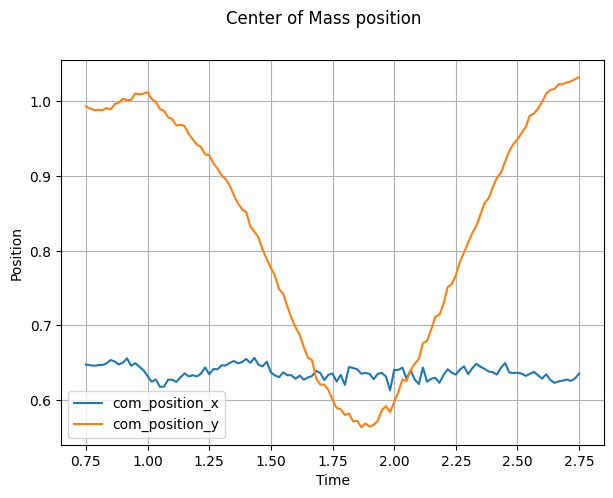

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Center of Mass position')

# Plot the knee angles on the first subplot.
axs.plot(x_time, com_x_acc.to_numpy(), label='com_position_x')
axs.plot(x_time, com_y_acc.to_numpy(), label='com_position_y')
axs.set_xlabel('Time')
axs.set_ylabel('Position')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

**Questions:**

7. On your plot of the com position, identify when motion events occur (deep squat, stand).

## 5.6. Conclusion

In this tutorial you previewed experimental data, and then performed an Inverse Kinematics analysis and an analysis to compute and plot center of mass during the motion.

## 5.7. Acknowledgements

The experimental gait data were collected by Jill Higginson and Chand John in the Neuromuscular Biomechanics Lab at the University of Delaware [[8]](https://doi.org/10.1080/10255842.2011.627560). The data include marker trajectories and ground reaction forces for an adult male walking at a self-selected speed on an instrumented split-belt treadmill. Please note that the data distributed with OpenSim is from a different subject than the one described in the paper. Data collection protocols were the same for both subjects.

## 5.8. Useful Links





> **OpenSim Website:** https://opensim.stanford.edu/
>
> **OpenSim API Documentation:** https://simtk.org/api_docs/opensim/api_docs/
>
> **OpenSim Creator Website:** https://opensimcreator.com/
>
> **SimTK Website:** https://simtk.org/projects/opensim
>
> **Biomechanics of Movement's Course:** https://www.youtube.com/channel/UCDNGy0KKNLQ-ztcL5h2Z6zA
>
> **Webinar on Scaling and Inverse Kinematics in OpenSim:** https://www.youtube.com/watch?v=ZG7wzvQC6eU

##5.9 Acknowledgments

The experimental gait data were collected by Jill Higginson and Chand John in the Neuromuscular Biomechanics Lab at the University of Delaware [[8]](https://doi.org/10.1080/10255842.2011.627560). The data include marker trajectories and ground reaction forces for an adult male walking at a self-selected speed on an instrumented split-belt treadmill. Please note that the data distributed with OpenSim is from a different subject than the one described in the paper. Data collection protocols were the same for both subjects.

Thanks to [OpenSimColab](https://simtk.org/projects/opencolab) project [[9]](https://doi.org/10.1080/10255842.2022.2104607) for creating the first OpenSim Conda package.

## 5.10. References


> [1].   Delp, S. L., Anderson, F. C., Arnold, A. S., Loan, P., Habib, A., John, C. T., Guendelman, E., & Thelen, D. G. (2007). **OpenSim: open-source software to create and analyze dynamic simulations of movement.** *IEEE Transactions on Bio-Medical Engineering*, 54(11), 1940–1950. https://doi.org/10.1109/TBME.2007.901024
>
> [2].   Delp, S. L., Loan, J. P., Hoy, M. G., Zajac, F. E., Topp, E. L., & Rosen, J. M. (1990). **An interactive graphics-based model of the lower extremity to study orthopaedic surgical procedures.** *IEEE Transactions on Bio-Medical Engineering*, 37(8), 757–767. https://doi.org/10.1109/10.102791
>
> [3]. Anderson, F. C., & Pandy, M. G. (1999). **A dynamic optimization solution for vertical jumping in three dimensions.** *Computer Methods in Biomechanics and Biomedical Engineering*, 2(3), 201–231. https://doi.org/10.1080/10255849908907988
>
> [4]. Winter, D. A. (1990). **The biomechanics and motor control of human movement** (2a ed.). *John Wiley & Sons*. https://onlinelibrary.wiley.com/doi/book/10.1002/9780470549148
>
> [5]. Kuo, A. D. (1998). **A least-squares estimation approach to improving the precision of inverse dynamics computations.** *Journal of Biomechanical Engineering*, 120(1), 148–159. https://doi.org/10.1115/1.2834295
>
> [6]. Thelen, D. G., & Anderson, F. C. (2006). **Using computed muscle control to generate forward dynamic simulations of human walking from experimental data.** *Journal of Biomechanics*, 39(6), 1107–1115. https://doi.org/10.1016/j.jbiomech.2005.02.010
>
> [7]. John, C.T., Anderson, F.C., Guendelman, E., Arnold, A.S., Delp, S.L. (21st October 2006). **An algorithm for generating muscle-actuated simulations of long-duration movements.** *Biomedical Computation at Stanford (BCATS) Symposium*, Stanford University, Poster Presentation. https://bcats.stanford.edu/previous_bcats/bcats06/pdf/BCATS_2006_abstract_book.pdf#page=31
>
> [8]. John, C. T., Anderson, F. C., Higginson, J. S., & Delp, S. L. (2013). **Stabilisation of walking by intrinsic muscle properties revealed in a three-dimensional muscle-driven simulation.** *Computer Methods in Biomechanics and Biomedical Engineering*, 16(4), 451–462. https://doi.org/10.1080/10255842.2011.627560
>
> [9] Mokhtarzadeh, H., Jiang, F., Zhao, S., & Malekipour, F. (2022). **OpenColab project: OpenSim in Google colaboratory to explore biomechanics on the web.** *Computer Methods in Biomechanics and Biomedical Engineering*, 1–9. https://doi.org/10.1080/10255842.2022.2104607